In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.17.1
GPU available: []


In [2]:
!pip install matplotlib opencv-python tensorflow pandas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2

In [4]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize images (scale pixel values to 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images for the model (add a channel dimension)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Print data shape
print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


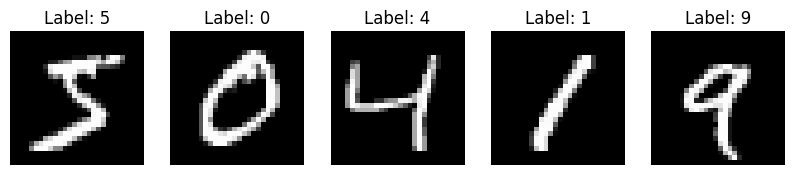

In [5]:
# Visualize 5 random images from the training set
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [8]:
def create_model(input_shape, num_classes):
    model = Sequential([
        # First convolutional layer
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        # Second convolutional layer
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Flatten the output
        Flatten(),

        # Fully connected dense layer
        Dense(128, activation='relu'),
        Dropout(0.5),  # Regularization to avoid overfitting

        # Output layer for classification
        Dense(num_classes, activation='softmax')  # Use 'softmax' for multiclass classification
    ])
    return model


In [9]:
# Example usage
input_shape = (28, 28, 1)  # Shape of input images (e.g., MNIST)
num_classes = 10           # Number of output classes (digits 0-9)

model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot labels
              metrics=['accuracy'])


In [10]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_images, train_labels,
                    epochs=10,                  # Number of training epochs
                    batch_size=32,              # Number of samples per batch
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.8764 - loss: 0.4009 - val_accuracy: 0.9826 - val_loss: 0.0524
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9760 - loss: 0.0818 - val_accuracy: 0.9879 - val_loss: 0.0347
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9830 - loss: 0.0560 - val_accuracy: 0.9908 - val_loss: 0.0277
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9867 - loss: 0.0407 - val_accuracy: 0.9922 - val_loss: 0.0248
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9882 - loss: 0.0401 - val_accuracy: 0.9905 - val_loss: 0.0293
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9906 - loss: 0.0306 - val_accuracy: 0.9927 - val_loss: 0.0243
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9915 - val_loss: 0.0255
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9915 -

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 - 3s - 9ms/step - accuracy: 0.9919 - loss: 0.0277
Test Accuracy: 0.99


In [13]:
model.save("handwritten_character_model.h5")


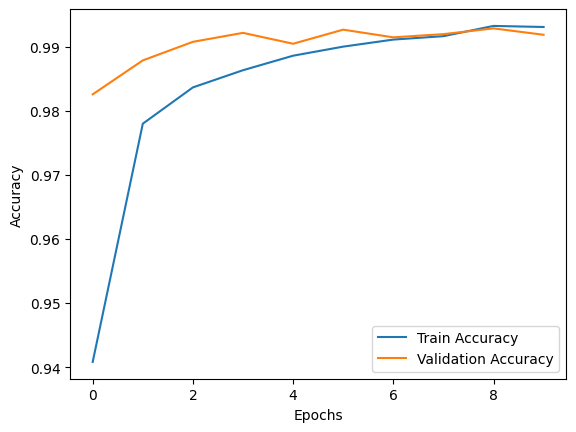

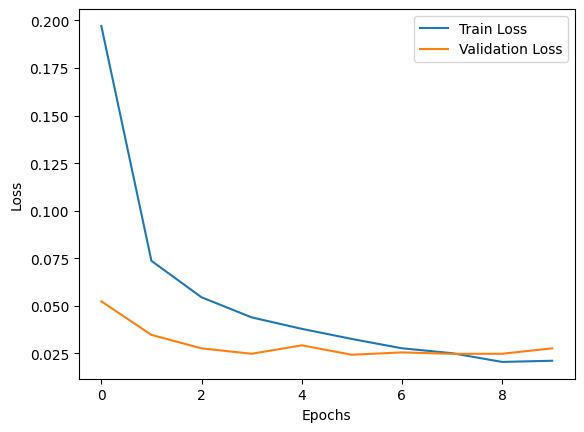

In [14]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
import tensorflow as tf
model = tf.keras.models.load_model('./handwritten_character_model.h5')
print('Model loaded sucessfully')

Model loaded sucessfully


In [17]:
import cv2

# Open the webcam (0 for default camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")


Error: Could not open camera.
